# Homework 2: Arrays and Data Frames (50 points)

Please complete this notebook by filling in the cells provided. The solved homework should be uploaded to Canvas.

**Reading**: Data8 textbook chapters [4](https://inferentialthinking.com/chapters/04/Data_Types.html), and [5](https://inferentialthinking.com/chapters/05/Sequences.html) .

**Deadline**: This assignment is due on Thursday, October 13 at 9:00am. Late work will not be accepted unless you have made special arrangements with the instructors.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck.


In [2]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. New York police complaints (18 points)

The Propublica Data Store distributes a dataset called **Civilian Complaints Against New York City Police Officers**, part of the **NYPD Files** datasets, last revised July 2020.

The terms of the dataset license do not permit third parties like our University to distribute it, so you have to download it directly from Propublica:
https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers

The download has several files including a .csv file with the name you see in the code cell below. When you read the file into the notebook, make sure you specify the correct path for the location of the file. The dataset contains 33,358 complaints (rows), about 2,000 a year since 2005.  Spend a minute looking at the data dictionary.  

In [3]:
# run this to load the data and verify the dimensions of the data frame
allegations = pd.read_csv("./data/allegations_202007271729.csv")
allegations.shape  ## (33358, 27)

(33358, 27)

In [4]:
# run this to see the first few rows of the data frame
allegations.head(5)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


**Question 1.** Add a column called `fullname` to the data frame `allegations` that combines `first_name` and `last_name`. Note that we will use this next to try to count the number of distinct individuals named in this dataset.

In [5]:
allegations['fullname'] = allegations['first_name'] + ' ' + allegations['last_name']

**Question 2.** Using only the `fullname` column you just created, estimate the number of individual officers who are named in the complaints database.

In [6]:
len(allegations['fullname'].unique())

3958

**Question 3.**  The `shield_no` column contains data on the shield numbers for the officers involved (similar to an id number). How many unique entries are in this column? What is the most common value for `shield_no` and why?

In [7]:
print(len(allegations['shield_no'].unique()))
allegations['shield_no'].value_counts() # keep information anonymized?

3334


0        5392
4446       76
122        75
5813       73
3830       66
         ... 
6380        1
8478        1
7904        1
20636       1
8409        1
Name: shield_no, Length: 3334, dtype: int64

0 is the most common since 0 means officer is unknown, their information is anonymized, or their id is not displayed.

**Question 4.** How many distinct names are in the group of officers with shield number equal to 0? 

In [8]:
len(allegations[allegations['shield_no'] == 0]['fullname'].unique())

458

**Question 5.** How many distinct names are in the group of officers with shield number different than 0? How does the number you get when adding the numbers you obtain in Question 4 and 5 compare to the one you get in Question 2? Why is there a difference?

In [9]:
len(allegations[allegations['shield_no'] != 0]['fullname'].unique())

3509

When adding the numbers in Q4 and Q5 we get a number higher than Q2. This difference is due to the fact that there is overlap between the set of unique names for officers with shield number of 0 and set of unique names for officers with shield number not 0.

**Question 6.** Estimate the number of officers in the database who are named in only a one complaint. (This is an estimate because it is possible that two officers could share first and last names and at the same time be missing unique identifiers.) How does this compare to the number of complaints?  

In [10]:
counts = allegations['fullname'].value_counts()
len(counts[counts==1])

358

In [11]:
len(allegations['complaint_id'].unique()) # much higher

12056

**Optional question.** What is the minimum number of officers you need to account for half of the complaints in the database?  You can find the minimum number of officers by selecting the officers in order from hihgest to smallest number of complaints, and checking how many you need to add up to half of the total.

## 2. Colleges (20 points)

The question uses data that we downloaded from Kaggle.com; more precisely from here:

https://www.kaggle.com/theriley106/university-statistics

The dataset was posted at the beginning of 2018, and was grabbed from US-News: https://www.usnews.com. It includes statistics for 311 US Universities. 

To make your tasks easier, we removed many of the columns and kept only 11. The corresponding file can be found here:

http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv

We will use these data in other homework. If you find it useful, you can download the file and open it with Excel - you might get a better understanding of the data. For example, there are universities for which there is incomplete data.

**Run the next cell that contains code that will allow you to read the data into a data frame called `colleges_df`.** It also shows the first 10 rows.

In [12]:
colleges_df=pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv')
colleges_df.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
5,33.0,1460.0,4524.0,8.0,95.0,58.0,20331.0,49892,Massachusetts Institute of Technology,5,private
6,31.0,1380.0,7034.0,5.0,95.0,47.0,19296.0,49617,Stanford University,5,private
7,32.0,1380.0,10019.0,9.0,93.0,47.0,25441.0,53534,University of Pennsylvania,8,private
8,31.0,1380.0,6609.0,11.0,92.0,41.0,23374.0,53744,Duke University,9,private
9,34.0,1510.0,979.0,8.0,91.0,51.0,23973.0,49908,California Institute of Technology,10,private


**Missing entries**. Run the cell code below to see the number of entries that are missing for each variable.

In [13]:
print(colleges_df.isnull().sum())

act-avg                   20
sat-avg                   20
enrollment                11
acceptance-rate            9
rankingDisplayScore       81
percent-receiving-aid    168
cost-after-aid           168
tuition                    0
displayName                0
overallRank                0
institutionalControl       0
dtype: int64


**Question 1.** Display a dataframe with the five universities with the largest enrollment, showing only the name, enrollment, tuition, and rank.

In [14]:
colleges_df[['displayName','enrollment','tuition','overallRank']].sort_values(by='enrollment',ascending=False).iloc[:5,:]

,displayName,enrollment,tuition,overallRank
172,University of Central Florida,55776.0,22467,171
71,Texas A&M University--College Station,50735.0,30208,69
247,Liberty University,47050.0,24304,-1
53,Ohio State University--Columbus,45831.0,29659,54
215,Florida International University,45813.0,18956,216


**Question 2.** 

Create a new column in the `colleges_df` called `Rounded_Tuition` that contains the tuition for all universities in the dataset rounded down to the nearest thousand (tuition of 54825 should be 54000 in the new column). 

Display the name of all universities that have rounded tuition equal to $45K.

In [15]:
# Display Universities with tuition between 44500 and 45499
colleges_df['Rounded_Tuition'] = (colleges_df['tuition'] / 1000).astype('int')*1000
colleges_df[colleges_df['Rounded_Tuition']==45000]['displayName']

15                      Rice University
103    Illinois Institute of Technology
Name: displayName, dtype: object

**Question 3.** What is the average tuition of the schools in this list?

In [16]:
colleges_df[colleges_df['Rounded_Tuition']==45000]['tuition'].mean()

45736.0

**Question 4.**  We are investigating here if smaller or larger colleges are cheaper. Find the average tuition for schools in these four groups: 
- enrollments smaller than 5,000 
- 5,001-10,000
- 10,001-30,000
- larger than 30,000.   


In [17]:
colleges_df[colleges_df['enrollment']<=5000]['tuition'].mean()

35167.78

In [18]:
colleges_df[(colleges_df['enrollment']>5000) & (colleges_df['enrollment']<=10000)]['tuition'].mean()

37016.23376623377

In [19]:
colleges_df[(colleges_df['enrollment']>10000) & (colleges_df['enrollment']<=30000)]['tuition'].mean()

28524.412587412586

In [20]:
colleges_df[colleges_df['enrollment']>30000]['tuition'].mean()

27315.6

**Question 5.** Based on these data, how much does a student pay tuition on average? Note that schools on this list with large enrollments affect more students; we ask you to find the average value of `tuition` with weights proportional to `enrollment`:

$$ \textrm {enrollment-weighted tuition} = {\sum (\textrm{enrollment} \times \textrm{tuition}) \over \sum \textrm{enrollment}} $$

For this question we need the schools that have complete data for tuition and enrollment. The data frame `new_df` contains that subset (see next cell). Use this data frame.

In [21]:
# run this cell
new_df = colleges_df.dropna(subset=['enrollment'])

In [22]:
(new_df['enrollment'] * new_df['tuition']).sum() / new_df['enrollment'].sum()

29575.569195294163

In [23]:
new_df.columns

Index(['act-avg', 'sat-avg', 'enrollment', 'acceptance-rate',
       'rankingDisplayScore', 'percent-receiving-aid', 'cost-after-aid',
       'tuition', 'displayName', 'overallRank', 'institutionalControl',
       'Rounded_Tuition'],
      dtype='object')

**Question 6.**  Do the public schools on the list tend to have higher enrollments?
Make a visualization to answer this question.  

<AxesSubplot:xlabel='institutionalControl', ylabel='enrollment'>

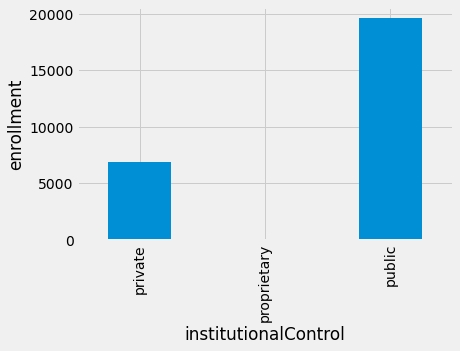

In [24]:
new_df.groupby('institutionalControl')['enrollment'].mean().plot.bar(ylabel='enrollment')

## 3. Data frames (12 points)


**Question 1.** Suppose you have 4 apples, 3 oranges, and 3 pineapples.  (Perhaps you're using Python to solve a high school Algebra problem.)  Create a data frame that contains this information.  It should have two columns: "fruit name" and "count".  Give it the name `fruits`.

**Note:** Use lower-case and singular words for the name of each fruit, like `"apple"`.

In [25]:
fruits = pd.DataFrame({'fruit name':['apple','orange','pineapple'],'count':[4,3,3]})
fruits

,fruit name,count
0,apple,4
1,orange,3
2,pineapple,3


**Question 2.** The file `inventory.csv` contains information about the inventory at a fruit stand.  Each row represents the contents of one box of fruit.  Load it as a data frame named `inventory`.

In [26]:
inventory = pd.read_csv('./data/inventory.csv')
inventory

,box ID,fruit name,count
0,53686,kiwi,45
1,57181,strawberry,123
2,25274,apple,20
3,48800,orange,35
4,26187,strawberry,255
5,57930,grape,517
6,52357,strawberry,102
7,43566,peach,40


**Question 3.** The file `sales.csv` contains the number of fruit sold from each box last Saturday.  It has an extra column called "price per fruit (\$)" that's the price *per item of fruit* for fruit in that box.  The rows are in the same order as the `inventory` data frame.  Load the file into a data frame called `sales`.

In [27]:
sales = pd.read_csv('./data/sales.csv')
sales

,box ID,fruit name,count sold,price per fruit ($)
0,53686,kiwi,3,0.50
1,57181,strawberry,101,0.20
2,25274,apple,0,0.80
3,48800,orange,35,0.60
4,26187,strawberry,25,0.15
5,57930,grape,355,0.06
6,52357,strawberry,102,0.25
7,43566,peach,17,0.80


**Question 4.** How many fruits did the store sell in total on that day?

In [28]:
total_fruits_sold = sales['count sold'].sum()
total_fruits_sold

638

**Question 5.** What was the store's total revenue (the total price of all fruits sold) on that day?

*Hint:* If you're stuck, think first about how you would compute the total revenue from just the grape sales.

In [29]:
total_revenue = (sales['count sold'] * sales['price per fruit ($)']).sum()
total_revenue

106.85000000000001

**Question 6.** Make a new data frame called `remaining_inventory`.  It should have the same rows and columns as `inventory`, except that the amount of fruit sold from each box should be subtracted from that box's count, so that the "count" is the amount of fruit remaining after Saturday.

In [30]:
remaining_inventory = pd.merge(inventory.iloc[:,:-1],pd.Series(inventory['count']-sales['count sold'],name='count'),left_index=True, right_index=True)
remaining_inventory

,box ID,fruit name,count
0,53686,kiwi,42
1,57181,strawberry,22
2,25274,apple,20
3,48800,orange,0
4,26187,strawberry,230
5,57930,grape,162
6,52357,strawberry,0
7,43566,peach,23
